## EDA CARS PRICE PREDRICTION

### Importing the libraries


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
import os
print(os.getcwd())


/run/media/viraj-dev/Viraj Local Drive/Machine Learning  Bootcamp - Krish Naik/Machine Learning Projects/Car Price Prediction/Notebook


In [37]:
cars_df = pd.read_csv('cars.csv')


In [38]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [39]:
cars_df.shape

(4340, 8)

#### Checking the null values

In [40]:
cars_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

#### Checking the duplicated values 

In [41]:
rows_list = cars_df[cars_df.duplicated()].index
rows_list

Index([  13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
       ...
       4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4311],
      dtype='int64', length=763)

#### Dropping all the duplicated values

In [42]:
cars_df = cars_df.drop_duplicates()

In [43]:
cars_df.duplicated().sum()

0

## Checking the data typs

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [45]:
## Checking the unique values 
cars_df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [46]:
cars_df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [48]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [53]:
print('Unique Values in the Car name column:    ',end=' ')
print(cars_df['name'].unique().sum())


print('Unique Values in the year  column:    ',end=' ')
print(cars_df['year'].unique())


print('Unique Values in the km_driven  name column:    ',end=' ')
print(cars_df['km_driven'].unique())

print('Unique Values in the  fuel column:    ',end=' ')
print(cars_df['fuel'].unique())

print('Unique Values in the  seller_type column:    ',end=' ')
print(cars_df['seller_type'].unique())

print('Unique Values in the  transmission column:    ',end=' ')
print(cars_df['transmission'].unique())

print('Unique Values in the  owner column:    ',end=' ')
print(cars_df['owner'].unique())


Unique Values in the Car name column:     Maruti 800 ACMaruti Wagon R LXI MinorHyundai Verna 1.6 SXDatsun RediGO T OptionHonda Amaze VX i-DTECMaruti Alto LX BSIIIHyundai Xcent 1.2 Kappa STata Indigo Grand PetrolHyundai Creta 1.6 VTVT SMaruti Celerio Green VXIChevrolet Sail 1.2 BaseToyota Corolla Altis 1.8 VL CVTMaruti Ciaz VXi PlusHyundai Venue SX Opt DieselChevrolet Enjoy TCDi LTZ 7 SeaterJaguar XF 2.2 Litre LuxuryMercedes-Benz New C-Class 220 CDI ATMaruti Vitara Brezza ZDi Plus AMTAudi Q5 2.0 TDIHonda City V MTTata Tigor 1.2 Revotron XTAudi A6 2.0 TDI  Design EditionMercedes-Benz New C-Class C 220 CDI AvantgardeSkoda Superb Ambition 2.0 TDI CR ATToyota Corolla Altis G ATToyota Innova 2.5 G (Diesel) 7 SeaterJeep Compass 1.4 Sport Plus BSIVMercedes-Benz E-Class E 200 CGI EleganceHyundai i10 Magna 1.1LBMW 3 Series 320d Sport LineAudi Q7 35 TDI Quattro PremiumHyundai Elantra CRDi SMahindra Scorpio 1.99 S10Honda City i DTEC VMaruti Wagon R VXI BS IV with ABSMaruti Wagon R VXI BS IVMahindr

#### Seperating the numerical and categorical features

In [54]:
numerical_features = [feature for feature in cars_df.columns if cars_df[feature].dtype != 'O']
categorical_features = [feature for feature in cars_df.columns if cars_df[feature].dtype == 'O']

In [56]:
print(f'We have {len(numerical_features)} numerical features:-  {numerical_features}')
print(f'We have {len(categorical_features)} categorical features:-  {categorical_features}')

We have 3 numerical features:-  ['year', 'selling_price', 'km_driven']
We have 5 categorical features:-  ['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [57]:
cars_df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


## Data Visuailization

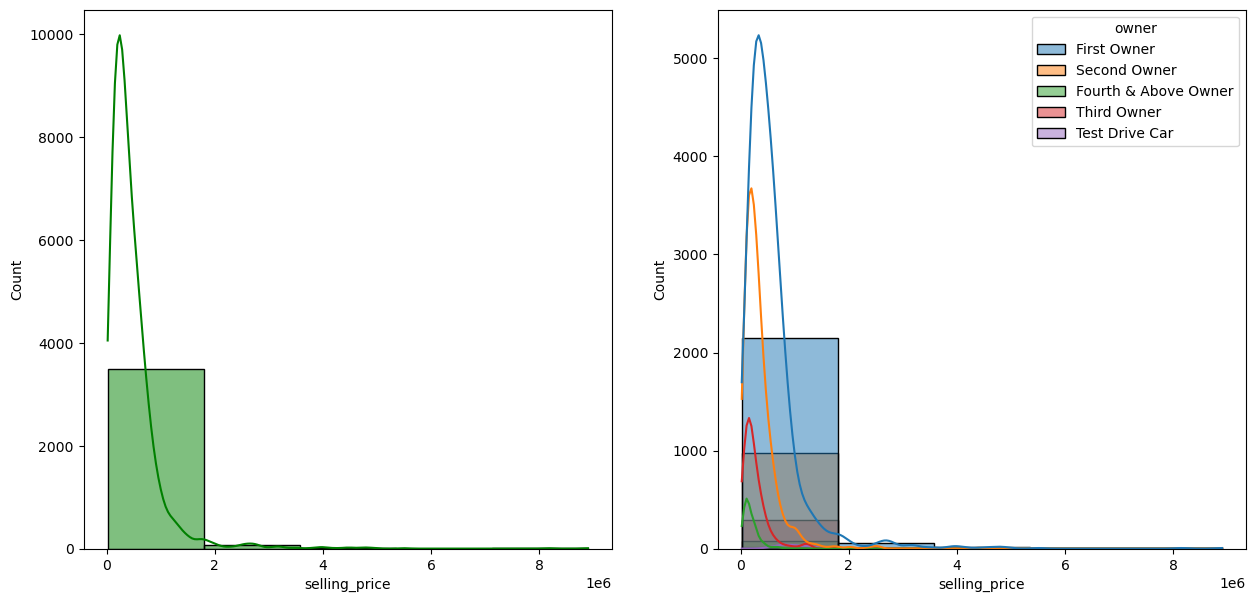

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=cars_df,x='selling_price',bins=5,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=cars_df,x='selling_price',kde=True,hue='owner',bins=5)
plt.show()

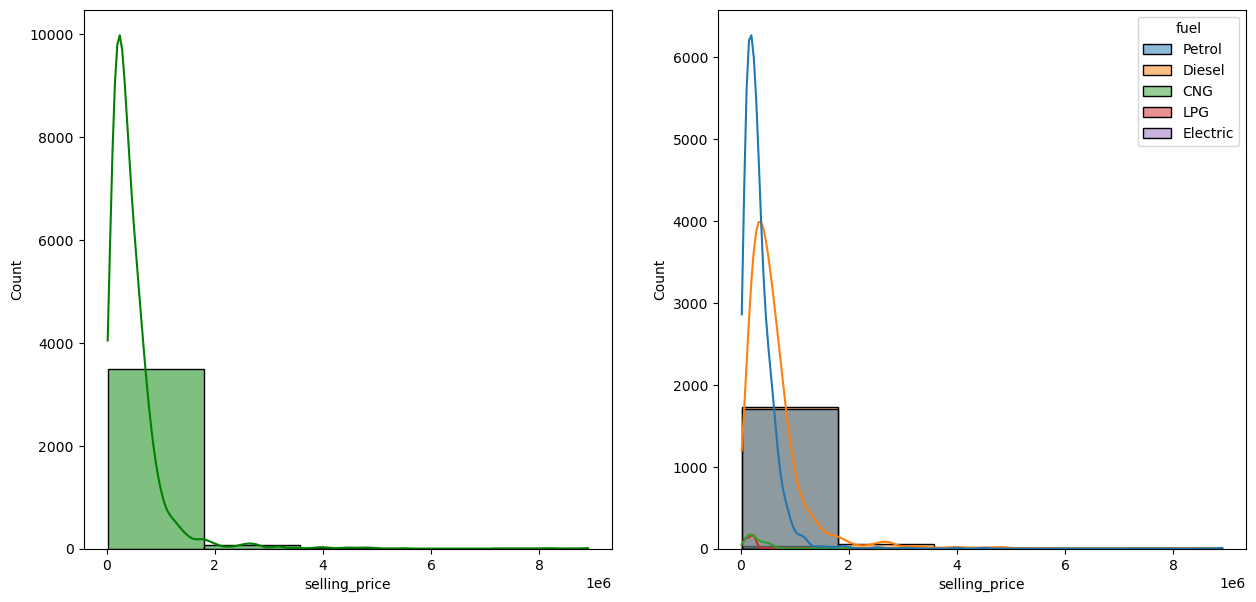

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=cars_df,x='selling_price',bins=5,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=cars_df,x='selling_price',kde=True,hue='fuel',bins=5)
plt.show()